In [81]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import io
import requests
from sklearn.model_selection import train_test_split
import time

def sss(i):
    h = int(i/3600)
    i = int(i%3600)
    m = int(i/60)
    s = int(i%60)
    return(h,m,s)

In [82]:
ff = 'datab-0-5-FO-250000N22'
ss = 'xgboostModel-FO-250000N22-100-1'
df_data=pd.read_csv(ff+'.csv')

print(df_data)

        protocol_type  count  srv_count  ...    Win  TSC   label
0                   0      0          0  ...    512    0  hping3
1                   0      1          1  ...    512    0  hping3
2                   0      2          2  ...    512    0  hping3
3                   0      3          3  ...    512    0  hping3
4                   0      4          4  ...    512    0  hping3
...               ...    ...        ...  ...    ...  ...     ...
252703              0      3          8  ...  64256    0  normal
252704              0      4          9  ...  64256    0  normal
252705              0      5         10  ...  64256    0  normal
252706              0      7         11  ...  65280    0  normal
252707              0      8         12  ...  65280    0  normal

[252708 rows x 17 columns]


In [83]:
df_data = df_data.sample(n=len(df_data) ,random_state=75,replace=False, axis=0)
print(df_data)

        protocol_type  count  srv_count  ...    Win  TSC      label
120174              0    511        511  ...   1152    0  slow read
158679              0      3          3  ...      0    0     normal
31340               2    511        511  ...      0    0       icmp
19360               0    511        511  ...    512    0     hping3
28259               0    511        511  ...    512    0     hping3
...               ...    ...        ...  ...    ...  ...        ...
211080              0      7          7  ...  64768    0     normal
185809              0      7          7  ...  64768    0     normal
198675              0      6          2  ...      0    0     normal
24944               0    511        511  ...    512    0     hping3
135416              0    511        511  ...   1152    0  slow read

[252708 rows x 17 columns]


In [84]:
df_data = df_data.dropna()#移除缺失值

#X = df_data.drop(labels=['situation'],axis=1).values # 移除Species (因為字母不參與訓練)
X = df_data.drop(labels=['label'],axis=1).values 
# checked missing data
print("checked missing data(NAN mount):",len(np.where(np.isnan(X))[0]))
print(X)
#y=df_data['situation'].values
y=df_data['label'].values
print(y)

checked missing data(NAN mount): 0
[[0.0000e+00 5.1100e+02 5.1100e+02 ... 1.8200e-05 1.1520e+03 0.0000e+00]
 [0.0000e+00 3.0000e+00 3.0000e+00 ... 7.1000e-06 0.0000e+00 0.0000e+00]
 [2.0000e+00 5.1100e+02 5.1100e+02 ... 1.7391e-03 0.0000e+00 0.0000e+00]
 ...
 [0.0000e+00 6.0000e+00 2.0000e+00 ... 1.4500e-05 0.0000e+00 0.0000e+00]
 [0.0000e+00 5.1100e+02 5.1100e+02 ... 1.0900e-05 5.1200e+02 0.0000e+00]
 [0.0000e+00 5.1100e+02 5.1100e+02 ... 4.1000e-05 1.1520e+03 0.0000e+00]]
['slow read' 'normal' 'icmp' ... 'normal' 'hping3' 'slow read']


In [85]:
from xgboost import XGBClassifier
t1 = time.time()#開始訓練時間
# 建立XGBClassifier模型
xgboostModel = XGBClassifier(n_estimators=100, learning_rate= 0.3)
# 使用訓練資料訓練模型
xgboostModel.fit(X, y)
t2 = time.time()#完成時間
t3 = t2-t1

In [86]:
predicted = xgboostModel.predict(X)
accuracy = xgboostModel.score(X, y)
t4 = time.time()#測試完成時間
t5 = t4-t2
print(predicted)
print(y)

['slow read' 'normal' 'icmp' ... 'normal' 'hping3' 'slow read']
['slow read' 'normal' 'icmp' ... 'normal' 'hping3' 'slow read']


In [87]:
true = []
for i in range(y.shape[0]):
  if y[i] == 'normal':
    true.append(2)
  elif y[i] == 'slowloris':
    true.append(1)
  elif y[i] == 'slow post':
    true.append(1)
  elif y[i] == 'slow read':
    true.append(1)
  elif y[i] == 'hping3':
    true.append(1)
  elif y[i] == 'icmp':
    true.append(1)

print('True:', true)

True: [1, 2, 1, 1, 1, 1, 1, 2, 1, 1, 1, 2, 2, 2, 2, 1, 1, 2, 2, 2, 2, 2, 1, 1, 2, 1, 2, 2, 2, 1, 1, 1, 1, 2, 1, 2, 1, 1, 2, 1, 1, 1, 1, 1, 2, 2, 2, 2, 1, 2, 2, 2, 1, 1, 2, 1, 1, 1, 1, 2, 2, 2, 1, 2, 1, 2, 1, 2, 1, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 1, 1, 2, 2, 2, 2, 2, 1, 1, 1, 2, 1, 2, 1, 1, 2, 1, 2, 2, 1, 2, 1, 2, 1, 1, 1, 1, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 2, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 1, 2, 1, 2, 1, 2, 2, 1, 2, 1, 2, 2, 1, 2, 2, 1, 1, 2, 2, 1, 1, 1, 2, 1, 2, 1, 1, 1, 1, 2, 2, 2, 1, 2, 2, 2, 2, 1, 1, 2, 2, 2, 1, 2, 1, 1, 1, 2, 2, 2, 1, 2, 1, 2, 1, 1, 2, 2, 1, 1, 1, 2, 1, 1, 1, 2, 2, 2, 1, 2, 1, 1, 1, 1, 2, 2, 1, 1, 2, 1, 1, 2, 1, 1, 1, 2, 1, 1, 2, 1, 1, 1, 2, 1, 2, 2, 2, 1, 1, 2, 1, 1, 2, 1, 1, 1, 1, 2, 2, 1, 2, 1, 2, 2, 2, 1, 2, 1, 1, 2, 2, 1, 1, 2, 1, 2, 2, 2, 1, 2, 1, 2, 2, 2, 1, 2, 2, 2, 1, 1, 1, 1, 2, 1, 2, 2, 2, 2, 1, 2, 1, 1, 1, 2, 2, 2, 1, 2, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 1, 1, 1, 2, 2, 1, 2, 1, 1, 1, 1, 2, 1, 1, 2, 2, 1, 1, 2, 

In [88]:
prediction = []
for i in range(predicted.shape[0]):
  if predicted[i] == 'normal':
    prediction.append(2)
  elif predicted[i] == 'slowloris':
    prediction.append(1)
  elif predicted[i] == 'slow post':
    prediction.append(1)
  elif predicted[i] == 'slow read':
    prediction.append(1)
  elif predicted[i] == 'hping3':
    prediction.append(1)
  elif predicted[i] == 'icmp':
    prediction.append(1)

print('Pred:', prediction)

Pred: [1, 2, 1, 1, 1, 1, 1, 2, 1, 1, 1, 2, 2, 2, 2, 1, 1, 2, 2, 2, 2, 2, 1, 1, 2, 1, 2, 2, 2, 1, 1, 1, 1, 2, 1, 2, 1, 1, 2, 1, 1, 1, 1, 1, 2, 2, 2, 2, 1, 2, 2, 2, 1, 1, 2, 1, 1, 1, 1, 2, 2, 2, 1, 2, 1, 2, 1, 2, 1, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 1, 1, 2, 2, 2, 2, 2, 1, 1, 1, 2, 1, 2, 1, 1, 2, 1, 2, 2, 1, 2, 1, 2, 1, 1, 1, 1, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 2, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 1, 2, 1, 2, 1, 2, 2, 1, 2, 1, 2, 2, 1, 2, 2, 1, 1, 2, 2, 1, 1, 1, 2, 1, 2, 1, 1, 1, 1, 2, 2, 2, 1, 2, 2, 2, 2, 1, 1, 2, 2, 2, 1, 2, 1, 1, 1, 2, 2, 2, 1, 2, 1, 2, 1, 1, 2, 2, 1, 1, 1, 2, 1, 1, 1, 2, 2, 2, 1, 2, 1, 1, 1, 1, 2, 2, 1, 1, 2, 1, 1, 2, 1, 1, 1, 2, 1, 1, 2, 1, 1, 1, 2, 1, 2, 2, 2, 1, 1, 2, 1, 1, 2, 1, 1, 1, 1, 2, 2, 1, 2, 1, 2, 2, 2, 1, 2, 1, 1, 2, 2, 1, 1, 2, 1, 2, 2, 2, 1, 2, 1, 2, 2, 2, 1, 2, 2, 2, 1, 1, 1, 1, 2, 1, 2, 2, 2, 2, 1, 2, 1, 1, 1, 2, 2, 2, 1, 2, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 1, 1, 1, 2, 2, 1, 2, 1, 1, 1, 1, 2, 1, 1, 2, 2, 1, 1, 2, 

In [89]:
from sklearn import metrics
Precision = metrics.precision_score(true, prediction)
Recall = metrics.recall_score(true, prediction)
F1 = metrics.f1_score(true, prediction)

print('模型準確率: ', accuracy)
print('Precision:',Precision)
print('Recall:',Recall)
print('F1:',F1)

模型準確率:  0.9319609984646311
Precision: 0.9999563569708828
Recall: 0.9992731131835462
F1: 0.9996146183267164


In [90]:
#顯示預測錯誤的結果
correct = []
miss = []
miss_list = []
correct_list = []
row = y.shape[0]
print('預測錯誤:')
for i in range(row):
    if y[i] != predicted[i]:
        correct.append(y[i])
        miss.append(predicted[i])
print('錯誤總數',len(miss))
for c in miss:
    if c in miss_list:
        i = 1
    else:
        miss_list.append(c)
for m in miss_list:
    print('錯誤:',m,miss.count(m))#預測錯誤label累計
print('--------------')
for c in correct:
    if c in correct_list:
        i = 1
    else:
        correct_list.append(c)
for m in correct_list:
    print('正確:',m,correct.count(m))#預測錯誤對應正確label累計

預測錯誤:
錯誤總數 17194
錯誤: slow post 13750
錯誤: slowloris 3344
錯誤: normal 100
--------------
正確: slowloris 13724
正確: slow post 3425
正確: slow read 39
正確: normal 6


In [91]:
import pickle
#存取模型
with open(ss+'.pickle','wb') as f:
    pickle.dump(xgboostModel, f)

特徵重要程度:  [3.2608153e-03 8.4464457e-03 2.6447584e-03 3.8275808e-01 7.9277932e-04
 4.4830074e-03 1.4915317e-03 4.1130292e-03 1.3889040e-02 2.6104378e-03
 3.1387022e-01 2.9082329e-04 2.7185637e-03 2.1507223e-03 2.5454420e-01
 1.9355461e-03]
模型準確率:  0.9319609984646311
Precision: 0.9999563569708828
Recall: 0.9992731131835462
F1: 0.9996146183267164
datab-0-5-FO-250000N22
訓練時間： 0 時 1 分 29 秒
測試時間： 0 時 0 分 9 秒
資料總數 252708
錯誤總數 17194


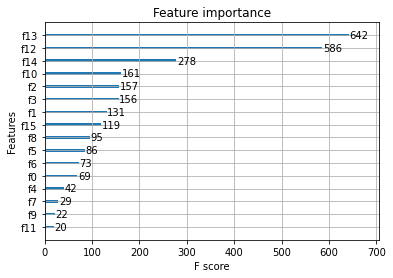

In [92]:
from xgboost import plot_importance
from xgboost import plot_tree

plot_importance(xgboostModel)
print('特徵重要程度: ',xgboostModel.feature_importances_)
print('模型準確率: ', accuracy)
print('Precision:',Precision)
print('Recall:',Recall)
print('F1:',F1)
print(ff)
h,m,s=sss(t3)
print('訓練時間：',h,'時',m,'分',s,'秒')
h1,m1,s1=sss(t5)
print('測試時間：',h1,'時',m1,'分',s1,'秒')
print('資料總數',X.shape[0])
print('錯誤總數',len(miss))

1=attack
2=noemal

In [93]:
from sklearn import metrics
t =[1,1,1,1,1,2,2,2,2,2]
p =[2,2,1,1,1,2,2,2,2,2]
Precision = metrics.precision_score(t, p)
Recall = metrics.recall_score(t, p)
F1 = metrics.f1_score(t, p)

print('Precision:',Precision)
print('Recall:',Recall)
print('F1:',F1)

Precision: 1.0
Recall: 0.6
F1: 0.7499999999999999
